## Análisis preliminar Despoblación

En este notebook analizamos algunos datos relevantes así como el comportamiento de algunas de las variables que forman el DataFrame Despoblacion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
Despoblacion = pd.read_csv('/home/dsc/Python/Despoblacion/4.Union_Depuracion_Data/Despoblacion_11.csv', 
                           dtype = {'Codigo CCAA' : str, 'Codigo Provincia' : str, 'Codigo Municipio' : str})

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas
0,Pais Vasco,16,Araba/Álava,01,Alegría-Dulantzi,01001,2803.0,1466.0,1337.0,19.95,140.50,568.0,37.0,18.0,14.0,784.0,617.0,453.0,164.0,175.0,86.0,89.0,0.0,0.0,0.0,0.0,1.0,4.0,25.0,1.0,1.0,150.0,127.0,277.0,279.0,268.0,547.0,667.0,1346.0,1249.0,645.0,1965.0,240.0,1250.0,1410.0,30.0,90.0,75.0,325.0,1835.0,255.0,120.0,120.0,230.0,390.0,60.0,60.0,335.0,195.0,2635.0,195.0,685.0,705.0,1125.0,105.0,40.0,655.0,425.0,1947.0,1664.0,1843.0,828.73,1124.34,35.0,6.0
1,Pais Vasco,16,Araba/Álava,01,Amurrio,01002,10014.0,5030.0,4984.0,96.30,103.99,219.0,104.0,37.0,88.0,4397.0,5861.0,4843.0,1018.0,720.0,330.0,390.0,0.0,0.0,0.0,0.0,2.0,9.0,185.0,3.0,0.0,409.0,334.0,742.0,869.0,918.0,1787.0,1316.0,5154.0,4435.0,1285.0,6935.0,1795.0,3975.0,5120.0,120.0,130.0,675.0,1750.0,6975.0,1955.0,245.0,320.0,745.0,1285.0,500.0,330.0,955.0,730.0,9265.0,730.0,2545.0,2945.0,2745.0,690.0,360.0,2360.0,1505.0,6906.0,6196.0,2166.0,3579.80,5568.50,381.0,367.0
2,Pais Vasco,16,Araba/Álava,01,Añana,01049,168.0,86.0,82.0,21.92,7.66,574.0,1.0,0.0,7.0,30.0,20.0,14.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,5.0,11.0,12.0,10.0,22.0,181.0,214.0,209.0,15.0,105.0,40.0,65.0,75.0,2.0,2.0,15.0,35.0,102.0,50.0,5.0,10.0,10.0,20.0,10.0,15.0,5.0,30.0,105.0,30.0,45.0,25.0,60.0,5.0,2.0,15.0,60.0,130.0,65.0,229.0,90.70,1212.00,20.0,9.0
3,Pais Vasco,16,Araba/Álava,01,Aramaio,01003,1496.0,784.0,712.0,73.02,20.49,333.0,13.0,3.0,10.0,224.0,141.0,88.0,53.0,23.0,12.0,11.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,0.0,0.0,23.0,34.0,57.0,42.0,38.0,80.0,423.0,706.0,681.0,265.0,955.0,290.0,725.0,680.0,2.0,2.0,95.0,250.0,980.0,325.0,25.0,70.0,45.0,205.0,45.0,70.0,60.0,125.0,1385.0,125.0,380.0,270.0,545.0,120.0,65.0,315.0,260.0,1236.0,1014.0,431.0,616.46,2055.80,191.0,215.0
4,Pais Vasco,16,Araba/Álava,01,Armiñón,01006,229.0,112.0,117.0,12.97,17.66,467.0,2.0,0.0,3.0,137.0,125.0,90.0,35.0,10.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,4.0,4.0,8.0,24.0,38.0,62.0,141.0,153.0,153.0,40.0,150.0,35.0,100.0,110.0,2.0,2.0,10.0,30.0,160.0,35.0,10.0,15.0,30.0,20.0,5.0,10.0,2.0,20.0,200.0,20.0,45.0,95.0,60.0,5.0,2.0,65.0,30.0,205.0,145.0,0.0,0.00,859.32,19.0,2.0


Incluimos la variable objetivo, llamada Umbral, en el DataFrame Despoblacion:
- 1 si es un municipio despoblado (Densidad 2021 <12,5)
- 0 si es un municipio poblado (Densidad 2021 >=12,5) 

Para ello necesitamos la densidad de cada municipio en 2021:

In [4]:
Densidad21 = pd.read_csv('/home/dsc/Python/Despoblacion/2.Data/03_Output_Densidad_Poblacion_21.csv' ,
                         dtype = {'Codigo Municipio' : str})

Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion
0,01001,19.95,146.62
1,01002,96.30,107.03
2,01003,73.02,19.94
3,01004,27.29,66.29
4,01006,12.97,17.81


In [5]:
Densidad21['Umbral'] = Densidad21['Densidad Poblacion'].map(lambda x: 1 if x < 12.5 else 0)

Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion,Umbral
0,01001,19.95,146.62,0
1,01002,96.30,107.03,0
2,01003,73.02,19.94,0
3,01004,27.29,66.29,0
4,01006,12.97,17.81,0


Merge con la tabla Despoblación para incluir la columna Umbral de 2021:

In [6]:
Despoblacion = Despoblacion.merge(Densidad21, how = 'left', on = 'Codigo Municipio')

Despoblacion.drop(['Superficie Km2_y', 'Densidad Poblacion_y'], axis = 1, inplace = True)
Despoblacion.rename({'Superficie Km2_x' : 'Superficie Km2', 'Densidad Poblacion_x' : 'Densidad Poblacion'},
                   axis = 1, inplace = True)

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Pais Vasco,16,Araba/Álava,01,Alegría-Dulantzi,01001,2803.0,1466.0,1337.0,19.95,140.50,568.0,37.0,18.0,14.0,784.0,617.0,453.0,164.0,175.0,86.0,89.0,0.0,0.0,0.0,0.0,1.0,4.0,25.0,1.0,1.0,150.0,127.0,277.0,279.0,268.0,547.0,667.0,1346.0,1249.0,645.0,1965.0,240.0,1250.0,1410.0,30.0,90.0,75.0,325.0,1835.0,255.0,120.0,120.0,230.0,390.0,60.0,60.0,335.0,195.0,2635.0,195.0,685.0,705.0,1125.0,105.0,40.0,655.0,425.0,1947.0,1664.0,1843.0,828.73,1124.34,35.0,6.0,0.0
1,Pais Vasco,16,Araba/Álava,01,Amurrio,01002,10014.0,5030.0,4984.0,96.30,103.99,219.0,104.0,37.0,88.0,4397.0,5861.0,4843.0,1018.0,720.0,330.0,390.0,0.0,0.0,0.0,0.0,2.0,9.0,185.0,3.0,0.0,409.0,334.0,742.0,869.0,918.0,1787.0,1316.0,5154.0,4435.0,1285.0,6935.0,1795.0,3975.0,5120.0,120.0,130.0,675.0,1750.0,6975.0,1955.0,245.0,320.0,745.0,1285.0,500.0,330.0,955.0,730.0,9265.0,730.0,2545.0,2945.0,2745.0,690.0,360.0,2360.0,1505.0,6906.0,6196.0,2166.0,3579.80,5568.50,381.0,367.0,0.0
2,Pais Vasco,16,Araba/Álava,01,Añana,01049,168.0,86.0,82.0,21.92,7.66,574.0,1.0,0.0,7.0,30.0,20.0,14.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,5.0,11.0,12.0,10.0,22.0,181.0,214.0,209.0,15.0,105.0,40.0,65.0,75.0,2.0,2.0,15.0,35.0,102.0,50.0,5.0,10.0,10.0,20.0,10.0,15.0,5.0,30.0,105.0,30.0,45.0,25.0,60.0,5.0,2.0,15.0,60.0,130.0,65.0,229.0,90.70,1212.00,20.0,9.0,1.0
3,Pais Vasco,16,Araba/Álava,01,Aramaio,01003,1496.0,784.0,712.0,73.02,20.49,333.0,13.0,3.0,10.0,224.0,141.0,88.0,53.0,23.0,12.0,11.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,0.0,0.0,23.0,34.0,57.0,42.0,38.0,80.0,423.0,706.0,681.0,265.0,955.0,290.0,725.0,680.0,2.0,2.0,95.0,250.0,980.0,325.0,25.0,70.0,45.0,205.0,45.0,70.0,60.0,125.0,1385.0,125.0,380.0,270.0,545.0,120.0,65.0,315.0,260.0,1236.0,1014.0,431.0,616.46,2055.80,191.0,215.0,0.0
4,Pais Vasco,16,Araba/Álava,01,Armiñón,01006,229.0,112.0,117.0,12.97,17.66,467.0,2.0,0.0,3.0,137.0,125.0,90.0,35.0,10.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,4.0,4.0,8.0,24.0,38.0,62.0,141.0,153.0,153.0,40.0,150.0,35.0,100.0,110.0,2.0,2.0,10.0,30.0,160.0,35.0,10.0,15.0,30.0,20.0,5.0,10.0,2.0,20.0,200.0,20.0,45.0,95.0,60.0,5.0,2.0,65.0,30.0,205.0,145.0,0.0,0.00,859.32,19.0,2.0,0.0


Vemos si hay nulos:

In [7]:
Despoblacion[Despoblacion['Umbral'].isnull()]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
2138,Galicia,12,"Coruña, A",15,Cesuras,15026,2225.0,1090.0,1135.0,79.46,28.0,231.0,3.0,9.0,35.0,325.0,67.0,40.0,27.0,125.0,84.0,41.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,21.0,22.0,43.0,25.0,23.0,48.0,1410.0,1417.0,1402.0,2.0,1340.0,495.0,870.0,995.0,2.0,2.0,310.0,225.0,1027.0,520.0,2.0,2.0,2.0,570.0,2.0,2.0,2.0,2.0,2090.0,2.0,105.0,455.0,145.0,1455.0,2.0,2.0,355.0,0.0,0.0,0.0,307.0,3005.72,558.0,642.0,NaN


Cesuras es un municipio que desde 2016 no existe, lo eliminamos del listado:

In [8]:
Despoblacion = Despoblacion.dropna(subset = ['Umbral'])

In [9]:
Despoblacion.shape

(8076, 76)

Guardamos el DataFrame definitivo que se utilizará en el ML

In [10]:
Despoblacion.to_csv('Despoblacion.csv', header = True, index = False)

### Datos relevantes

#### **1. CCAA y provincias con más municipios ya despoblados en 2011:**

In [11]:
MunicipiosDespoblados = Despoblacion[Despoblacion['Densidad Poblacion'] < 12.5]

MunicipiosDespoblados.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
2,Pais Vasco,16,Araba/Álava,01,Añana,01049,168.0,86.0,82.0,21.92,7.66,574.0,1.0,0.0,7.0,30.0,20.0,14.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,5.0,11.0,12.0,10.0,22.0,181.0,214.0,209.0,15.0,105.0,40.0,65.0,75.0,2.0,2.0,15.0,35.0,102.0,50.0,5.0,10.0,10.0,20.0,10.0,15.0,5.0,30.0,105.0,30.0,45.0,25.0,60.0,5.0,2.0,15.0,60.0,130.0,65.0,229.0,90.70,1212.00,20.0,9.0,1.0
5,Pais Vasco,16,Araba/Álava,01,Arraia-Maeztu,01037,722.0,402.0,320.0,123.11,5.86,649.0,10.0,2.0,3.0,212.0,248.0,116.0,132.0,38.0,18.0,20.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,23.0,24.0,47.0,37.0,53.0,90.0,505.0,610.0,609.0,85.0,475.0,180.0,330.0,325.0,2.0,15.0,65.0,135.0,505.0,160.0,20.0,35.0,35.0,100.0,30.0,40.0,155.0,100.0,615.0,100.0,230.0,160.0,120.0,90.0,35.0,135.0,190.0,694.0,448.0,294.0,225.00,3045.38,107.0,60.0,1.0
11,Pais Vasco,16,Araba/Álava,01,Barrundia,01013,906.0,497.0,409.0,97.42,9.30,575.0,3.0,1.0,6.0,197.0,97.0,68.0,29.0,28.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,25.0,21.0,46.0,49.0,31.0,80.0,483.0,512.0,512.0,160.0,600.0,145.0,450.0,375.0,2.0,10.0,55.0,130.0,590.0,155.0,95.0,70.0,50.0,95.0,45.0,30.0,2.0,85.0,795.0,85.0,225.0,180.0,305.0,75.0,35.0,175.0,180.0,785.0,541.0,0.0,403.45,3839.51,149.0,82.0,1.0
13,Pais Vasco,16,Araba/Álava,01,Bernedo,01016,565.0,329.0,236.0,130.48,4.33,710.0,6.0,3.0,9.0,281.0,155.0,75.0,80.0,15.0,11.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,26.0,31.0,57.0,38.0,45.0,83.0,508.0,569.0,568.0,70.0,350.0,145.0,215.0,285.0,2.0,20.0,35.0,105.0,385.0,150.0,2.0,70.0,50.0,45.0,40.0,20.0,25.0,105.0,430.0,105.0,210.0,130.0,80.0,2.0,40.0,100.0,180.0,534.0,324.0,137.0,267.16,4380.97,88.0,40.0,1.0
18,Pais Vasco,16,Araba/Álava,01,Erriberagoitia/Ribera Alta,01046,781.0,440.0,341.0,119.82,6.52,545.0,5.0,2.0,6.0,156.0,167.0,110.0,57.0,37.0,19.0,18.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,1.0,0.0,35.0,32.0,68.0,72.0,69.0,141.0,845.0,878.0,877.0,115.0,525.0,145.0,270.0,430.0,20.0,20.0,45.0,110.0,515.0,160.0,2.0,70.0,65.0,75.0,25.0,40.0,85.0,95.0,670.0,95.0,230.0,165.0,165.0,100.0,35.0,145.0,185.0,806.0,499.0,0.0,256.90,3955.96,117.0,50.0,1.0


In [12]:
MunicipiosDespoblados = MunicipiosDespoblados.groupby(['Nombre CCAA', 'Nombre Provincia'])['Nombre Municipio'].\
                        count().sort_values(ascending = False)
MunicipiosDespoblados= pd.DataFrame(MunicipiosDespoblados).reset_index()
MunicipiosDespoblados = MunicipiosDespoblados.rename({'Nombre Municipio' : 'Nº de municipios'}, axis = 1)

MunicipiosDespoblados.head()

,Nombre CCAA,Nombre Provincia,Nº de municipios
0,Castilla y León,Burgos,293
1,Castilla y León,Salamanca,245
2,Castilla-La Mancha,Guadalajara,242
3,Aragón,Teruel,203
4,Castilla-La Mancha,Cuenca,193


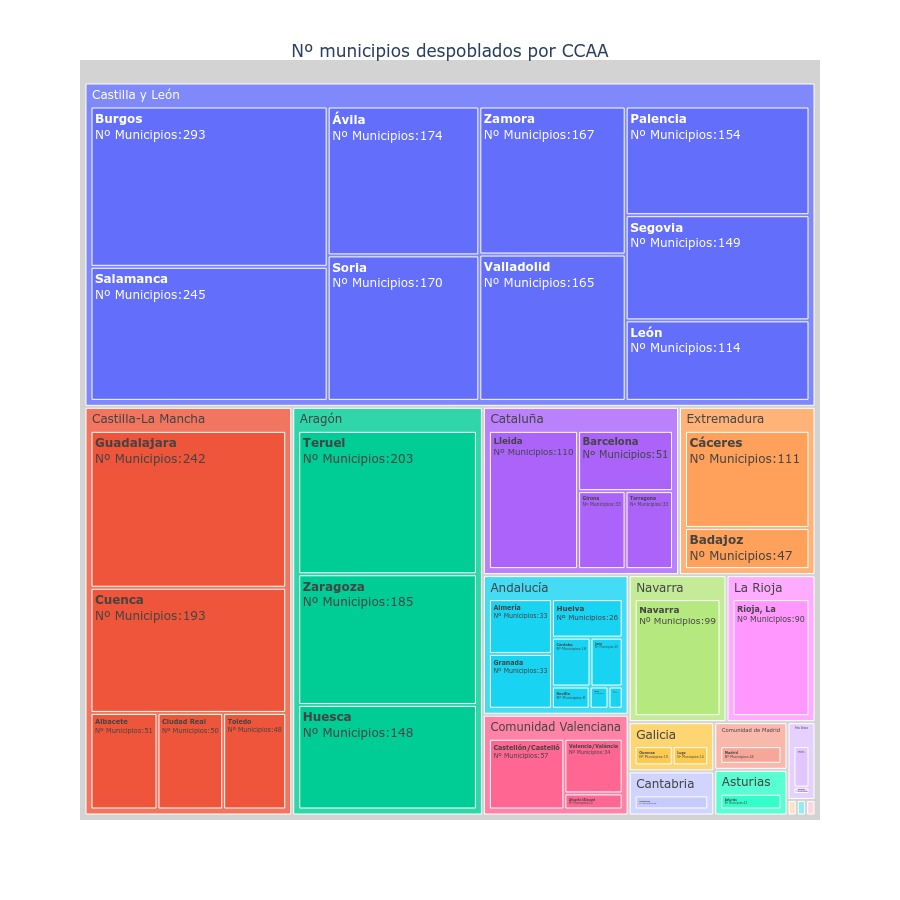

In [13]:
fig = px.treemap(MunicipiosDespoblados, path=['Nombre CCAA','Nombre Provincia'], values= 'Nº de municipios',
                width = 900, height = 900)
fig.update_traces(root_color="lightgrey")
fig.data[0].texttemplate = "<b>%{label}</b><br>Nº Municipios:%{value}"
fig.update_layout(
  title = 'Nº municipios despoblados por CCAA', 
  title_x = 0.5,
  title_y = 0.95)

fig.show('jpg')

#### **2. Superficie Km2, Población total, % de hombres, % de mujeres y densidad media en los años 2011 y 2021**

Para ello vamos a necesitar además de los datos de densidad de 2021, los datos de población de dicho año:

In [14]:
Poblacion21 = pd.read_csv('/home/dsc/Python/Despoblacion/2.Data/02_Output_Poblacion_21.csv' ,
                         dtype = {'Codigo Municipio' : str})

Despoblacion21 = Densidad21.merge(Poblacion21, how = 'left', on = 'Codigo Municipio')
Despoblacion21 = Despoblacion21.drop('Umbral', axis = 1)

Despoblacion21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion,Poblacion Total,Poblacion Hombre,Poblacion Mujer
0,01001,19.95,146.62,2925.0,1517.0,1408.0
1,01002,96.30,107.03,10307.0,5084.0,5223.0
2,01003,73.02,19.94,1456.0,756.0,700.0
3,01004,27.29,66.29,1809.0,888.0,921.0
4,01006,12.97,17.81,231.0,117.0,114.0


In [15]:
print('Indicadores 2011')
print('')

SuperficieTotal = Despoblacion['Superficie Km2'].sum()
print(f'La superficie total del territorio nacinal es: {SuperficieTotal.round(2)} km2')

PoblacionTotal11 = Despoblacion['Poblacion Total'].sum()
print(f'La población total en España en 2011 era de: {PoblacionTotal11} habitantes')

DespoblacionHombres11 = (Despoblacion['Poblacion Hombre'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'El porcentaje de hombres en España en 2011 era de: {DespoblacionHombres11.round(2)}%')

DespoblacionMujeres11 = (Despoblacion['Poblacion Mujer'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'El porcentaje de mujeres en España en 2011 era de: {DespoblacionMujeres11.round(2)}%')

DespoblacionDensidad11 = round(Despoblacion['Densidad Poblacion'].mean(), 2)
print(f'La media de la densidad de población en 2011 era de: {DespoblacionDensidad11} hab/km2')

Indicadores 2011

La superficie total del territorio nacinal es: 503042.95 km2
La población total en España en 2011 era de: 47119543.0 habitantes
El porcentaje de hombres en España en 2011 era de: 49.34%
El porcentaje de mujeres en España en 2011 era de: 50.66%
La media de la densidad de población en 2011 era de: 174.28 hab/km2


In [16]:
print('Indicadores 2021')
print('')

PoblacionTotal21 = Despoblacion21['Poblacion Total'].sum()
print(f'La población total en España en 2021 era de: {PoblacionTotal21} habitantes')

DespoblacionHombres21 = (Despoblacion21['Poblacion Hombre'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'El porcentaje de hombres en España en 2021 era de: {DespoblacionHombres21.round(2)}%')

DespoblacionMujeres21 = (Despoblacion21['Poblacion Mujer'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'El porcentaje de mujeres en España en 2021 era de: {DespoblacionMujeres21.round(2)}%')

DespoblacionDensidad21 = round(Despoblacion21['Densidad Poblacion'].mean(), 2)
print(f'La media de la densidad de población en 2021 era de: {DespoblacionDensidad21} hab/km2')

Indicadores 2021

La población total en España en 2021 era de: 47385107.0 habitantes
El porcentaje de hombres en España en 2021 era de: 49.01%
El porcentaje de mujeres en España en 2021 era de: 50.99%
La media de la densidad de población en 2021 era de: 178.6 hab/km2


#### **3. Grado de concentración rural 2011 y 2021**

In [17]:
print('Grado de concentración rural 2011')
print('')

Despoblado11 = Despoblacion[Despoblacion['Densidad Poblacion']<12.5]

DespobladoSuperficie11 = (Despoblado11['Superficie Km2'].sum()/Despoblacion['Superficie Km2'].sum())*100
print(f'Porcentaje de superficie despoblada en 2011 era de: {DespobladoSuperficie11.round(2)}%')

PorcentajeDespoblado11 = (Despoblado11['Poblacion Total'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'Porcentaje de población que vivía en territorio despoblado en 2011: {PorcentajeDespoblado11.round(2)}%')

print('')

print('Grado de concentración rural 2021')
print('')

Despoblado21 = Despoblacion21[Despoblacion21['Densidad Poblacion']<12.5]

DespobladoSuperficie21 = (Despoblado21['Superficie Km2'].sum()/Despoblacion21['Superficie Km2'].sum())*100
print(f'Porcentaje de superficie despoblada en 2021 era de: {DespobladoSuperficie21.round(2)}%')

PorcentajeDespoblado21 = (Despoblado21['Poblacion Total'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'Porcentaje de población que vivía en territorio despoblado en 2021: {PorcentajeDespoblado21.round(2)}%')


Grado de concentración rural 2011

Porcentaje de superficie despoblada en 2011 era de: 45.65%
Porcentaje de población que vivía en territorio despoblado en 2011: 2.74%

Grado de concentración rural 2021

Porcentaje de superficie despoblada en 2021 era de: 48.65%
Porcentaje de población que vivía en territorio despoblado en 2021: 2.73%


#### **4. Municipios despoblados 2021 y su situación en 2011.**

In [18]:
UmbralDespoblado11 = Despoblacion[Despoblacion['Umbral'] == 1]

print(f'Hay {UmbralDespoblado11.shape[0]} municipios despolbados en 2021')

Hay 3926 municipios despolbados en 2021


In [19]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio', 
            'Nombre Municipio', 'Poblacion Total', 'Densidad Poblacion', 'Umbral']

UmbralDespoblado11 = UmbralDespoblado11[Columnas].sort_values('Densidad Poblacion', ascending = False)
UmbralDespoblado11 = UmbralDespoblado11[UmbralDespoblado11['Densidad Poblacion'] >= 12.5]

UmbralDespoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total,Densidad Poblacion,Umbral
2681,Andalucía,Granada,18020,Arenas del Rey,1981.0,21.34,1.0
2926,Castilla-La Mancha,Guadalajara,19119,Fuencemillán,139.0,19.17,1.0
3219,Andalucía,Huelva,21017,Calañas,4187.0,17.61,1.0
7714,Castilla y León,Zamora,49192,San Miguel del Valle,188.0,17.54,1.0
4494,Andalucía,Málaga,29057,Genalguacil,544.0,17.07,1.0


In [20]:
print(f'Hay {UmbralDespoblado11.shape[0]} municipios que no estaban despoblados en 2011')

Hay 261 municipios que no estaban despoblados en 2011


In [21]:
UmbralDespoblado11 = UmbralDespoblado11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
UmbralDespoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Andalucía,Granada,18020,Arenas del Rey,1981.0,21.34,1.0,92.81,6.72,624.0,332.0,292.0
1,Castilla-La Mancha,Guadalajara,19119,Fuencemillán,139.0,19.17,1.0,7.25,11.86,86.0,52.0,34.0
2,Andalucía,Huelva,21017,Calañas,4187.0,17.61,1.0,237.83,11.62,2763.0,1408.0,1355.0
3,Castilla y León,Zamora,49192,San Miguel del Valle,188.0,17.54,1.0,10.72,11.94,128.0,67.0,61.0
4,Andalucía,Málaga,29057,Genalguacil,544.0,17.07,1.0,31.87,12.27,391.0,196.0,195.0


In [22]:
UmbralDespoblado11['Descenso Densidad'] = UmbralDespoblado11['Densidad Poblacion21']\
                                         - UmbralDespoblado11['Densidad Poblacion11']
UmbralDespoblado11.iloc[UmbralDespoblado11['Descenso Densidad'].idxmax()]

UmbralDespoblado11['Descenso Poblacion'] = UmbralDespoblado11['Poblacion Total21']\
                                         - UmbralDespoblado11['Poblacion Total11']
UmbralDespoblado11.iloc[UmbralDespoblado11['Descenso Poblacion'].idxmin()] 

print('- Malpartida de Plasencia municipio de Cáceres con mayor descenso de densidad:-22')
print('- Calañas municipio de Huelva con un mayor descenso de poblacion: -1424')

- Malpartida de Plasencia municipio de Cáceres con mayor descenso de densidad:-22
- Calañas municipio de Huelva con un mayor descenso de poblacion: -1424


#### **5. Municipios poblados en 2021 y su situación en 2011**

In [23]:
UmbralPoblado11 = Despoblacion[Despoblacion['Umbral'] == 0]

print(f'Hay {UmbralPoblado11.shape[0]} municipios poblados en 2021')

Hay 4150 municipios poblados en 2021


In [24]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio', 
            'Nombre Municipio', 'Poblacion Total', 'Densidad Poblacion', 'Umbral']

UmbralPoblado11 = UmbralPoblado11[Columnas].sort_values('Densidad Poblacion', ascending = False)
UmbralPoblado11 = UmbralPoblado11[UmbralPoblado11['Densidad Poblacion'] < 12.5]

UmbralPoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total,Densidad Poblacion,Umbral
2592,Cataluña,Girona,17159,Sant Feliu de Buixalleu,768.0,12.37,0.0
2767,Andalucía,Granada,18124,Lújar,453.0,12.28,0.0
7259,Castilla y León,Valladolid,47057,Cubillas de Santa Marta,288.0,12.23,0.0
2554,Cataluña,Girona,17119,Palau de Santa Eulàlia,104.0,12.04,0.0
7864,Aragón,Zaragoza,50092,Chiprana,465.0,11.93,0.0


In [25]:
print(f'Hay {UmbralPoblado11.shape[0]} municipios que estaban despoblados en 2011')

Hay 21 municipios que estaban despoblados en 2011


In [26]:
UmbralPoblado11 = UmbralPoblado11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
UmbralPoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Cataluña,Girona,17159,Sant Feliu de Buixalleu,768.0,12.37,0.0,62.09,13.01,808.0,415.0,393.0
1,Andalucía,Granada,18124,Lújar,453.0,12.28,0.0,36.88,12.91,476.0,256.0,220.0
2,Castilla y León,Valladolid,47057,Cubillas de Santa Marta,288.0,12.23,0.0,23.55,14.95,352.0,202.0,150.0
3,Cataluña,Girona,17119,Palau de Santa Eulàlia,104.0,12.04,0.0,8.64,12.85,111.0,62.0,49.0
4,Aragón,Zaragoza,50092,Chiprana,465.0,11.93,0.0,38.98,12.90,503.0,266.0,237.0


In [27]:
UmbralPoblado11['Incremento Densidad'] = UmbralPoblado11['Densidad Poblacion21']\
                                       - UmbralPoblado11['Densidad Poblacion11']
UmbralPoblado11.iloc[UmbralPoblado11['Incremento Densidad'].idxmax()]

UmbralPoblado11['Incremento Poblacion'] = UmbralPoblado11['Poblacion Total21']\
                                        - UmbralPoblado11['Poblacion Total11']
UmbralPoblado11.iloc[UmbralPoblado11['Incremento Poblacion'].idxmax()]

print('- Buenavista municipio de Salamanca con mayor ascenso de densidad: 4.4')
print('- Golmayo municipio de Soria con un mayor ascenso de poblacion: 711')

- Buenavista municipio de Salamanca con mayor ascenso de densidad: 4.4
- Golmayo municipio de Soria con un mayor ascenso de poblacion: 711


#### **6. Municipios con mayor población**

In [28]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio' ,'Nombre Municipio', 
            'Densidad Poblacion', 'Umbral', 'Poblacion Total']

MayorPoblacion11 = Despoblacion[Columnas].sort_values('Poblacion Total', ascending = False).head(6)

In [29]:
print(f'Hay {MayorPoblacion11.shape[0]} municipios que tienen más de medio millon de habitantes en 2011')

MayorPoblacion11.head(6)

Hay 6 municipios que tienen más de medio millon de habitantes en 2011


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion,Umbral,Poblacion Total
4337,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,0.0,3265038.0
877,Cataluña,Barcelona,08019,Barcelona,16032.63,0.0,1615448.0
7185,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,0.0,798033.0
6126,Andalucía,Sevilla,41091,Sevilla,4950.85,0.0,703021.0
8073,Aragón,Zaragoza,50297,Zaragoza,692.74,0.0,674725.0
4504,Andalucía,Málaga,29067,Málaga,1435.47,0.0,568030.0


In [30]:
MayorPoblacion11 = MayorPoblacion11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
MayorPoblacion11

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion11,Umbral,Poblacion Total11,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,0.0,3265038.0,605.77,5456.54,3305408.0,1540894.0,1764514.0
1,Cataluña,Barcelona,08019,Barcelona,16032.63,0.0,1615448.0,100.76,16243.87,1636732.0,778744.0,857988.0
2,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,0.0,798033.0,139.27,5670.60,789744.0,374937.0,414807.0
3,Andalucía,Sevilla,41091,Sevilla,4950.85,0.0,703021.0,142.00,4818.55,684234.0,324312.0,359922.0
4,Aragón,Zaragoza,50297,Zaragoza,692.74,0.0,674725.0,974.00,693.33,675301.0,323111.0,352190.0
5,Andalucía,Málaga,29067,Málaga,1435.47,0.0,568030.0,395.71,1459.16,577405.0,277234.0,300171.0


In [31]:
MayorPoblacion11['Incremento Poblacion'] = MayorPoblacion11['Poblacion Total21']\
                                         - MayorPoblacion11['Poblacion Total11']

MayorPoblacion11['Incremento Densidad'] = MayorPoblacion11['Densidad Poblacion21']\
                                        - MayorPoblacion11['Densidad Poblacion11']

print('- Madrid con mayor incremento de población: 40370.\n- Barcelona con mayor incremento de densidad: 211.24')
print('- Descenso de población y densidad en Valencia y Sevilla')
MayorPoblacion11.sort_values('Incremento Poblacion', ascending = False)

- Madrid con mayor incremento de población: 40370.
- Barcelona con mayor incremento de densidad: 211.24
- Descenso de población y densidad en Valencia y Sevilla


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion11,Umbral,Poblacion Total11,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer,Incremento Poblacion,Incremento Densidad
0,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,0.0,3265038.0,605.77,5456.54,3305408.0,1540894.0,1764514.0,40370.0,66.64
1,Cataluña,Barcelona,08019,Barcelona,16032.63,0.0,1615448.0,100.76,16243.87,1636732.0,778744.0,857988.0,21284.0,211.24
5,Andalucía,Málaga,29067,Málaga,1435.47,0.0,568030.0,395.71,1459.16,577405.0,277234.0,300171.0,9375.0,23.69
4,Aragón,Zaragoza,50297,Zaragoza,692.74,0.0,674725.0,974.00,693.33,675301.0,323111.0,352190.0,576.0,0.59
2,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,0.0,798033.0,139.27,5670.60,789744.0,374937.0,414807.0,-8289.0,-59.51
3,Andalucía,Sevilla,41091,Sevilla,4950.85,0.0,703021.0,142.00,4818.55,684234.0,324312.0,359922.0,-18787.0,-132.30


### Análisis variable objetivo: Umbral

In [32]:
Despoblacion['Umbral'].value_counts()

0.0    4150
1.0    3926
Name: Umbral, dtype: int64

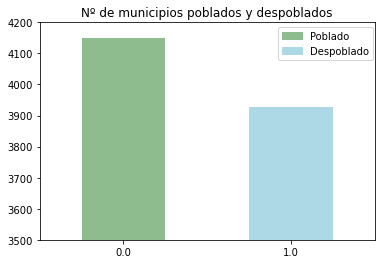

In [33]:
Despoblacion['Umbral'].value_counts().plot(kind="bar",color=['darkseagreen', 'lightblue'])

plt.title('Nº de municipios poblados y despoblados')

plt.xticks(rotation=0)
colors = {'Poblado':'darkseagreen', 'Despoblado':'lightblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.01, 1))
plt.ylim(3500, 4200)

plt.show()

### Análisis descriptivo

In [34]:
Descriptivo = Despoblacion.describe().apply(lambda s: s.apply('{0:.2f}'.format))
Descriptivo

,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
count,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00,8076.00
mean,5834.51,2878.63,2955.88,62.29,174.28,613.02,58.18,19.99,47.72,2087.54,1784.17,974.55,809.62,546.76,273.18,273.58,11.16,13.09,16.15,122.73,1.73,4.19,42.56,0.53,0.18,395.27,385.10,780.38,409.45,462.26,871.70,1212.38,3262.57,3116.97,925.76,3851.34,980.80,2505.69,2627.49,82.67,182.51,354.57,1242.26,3565.47,1098.18,170.54,235.37,416.60,734.57,283.67,194.58,788.35,518.31,5222.77,518.31,1345.53,1452.52,1657.95,530.38,253.73,1244.93,990.71,4142.59,3231.74,3484.98,2308.48,3784.37,158.37,56.87,0.49
std,47544.00,22533.50,25018.15,92.26,879.56,343.71,475.23,179.87,397.31,24489.01,17244.55,8670.59,8613.03,3783.14,1887.57,1899.07,43.54,72.23,127.09,1687.55,3.62,27.38,304.54,3.57,1.68,4153.15,4578.95,8724.23,4921.69,6444.66,11362.08,3235.29,24207.10,22845.58,6883.42,31085.92,8815.99,21421.93,19648.55,766.65,1722.01,3203.99,8021.88,31908.63,9322.62,1183.73,1686.48,3513.06,5750.39,2280.34,1506.65,9852.58,5341.24,41404.12,5341.24,11973.15,11296.23,12034.19,4184.59,2125.34,11989.88,7229.55,29681.13,24668.20,74299.00,25164.03,6527.82,278.63,166.12,0.50
min,5.00,3.00,2.00,0.03,0.29,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,6.00,7.00,0.00,2.00,2.00,0.00,2.00,2.00,2.00,0.00,2.00,4.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179.00,96.00,82.00,18.48,5.55,334.00,0.00,0.00,2.00,34.00,19.00,12.00,5.00,8.00,4.00,3.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,3.00,7.00,7.00,6.00,13.00,169.00,181.00,180.00,10.00,100.00,55.00,65.00,85.00,2.00,2.00,15.00,55.00,82.00,60.00,2.00,15.00,10.00,20.00,10.00,2.00,2.00,25.00,145.00,25.00,50.00,40.00,35.00,10.00,2.00,15.00,55.00,163.00,93.00,0.00,34.20,851.22,30.00,5.00,0.00
50%,582.00,306.00,280.00,34.94,15.04,666.00,3.00,1.00,7.00,132.00,100.00,59.00,36.00,38.00,20.00,17.00,1.00,1.00,1.00,6.00,1.00,1.00,3.00,0.00,0.00,18.00,16.00,34.00,23.00,22.00,46.00,410.00,488.50,484.00,60.00,350.00,155.00,220.00,280.00,2.00,2.00,50.00,175.00,300.00,160.00,15.00,40.00,35.00,75.00,30.00,25.00,25.00,65.00,492.50,65.00,155.00,1

Mayores valores extremos:

In [35]:
Descriptivo = Descriptivo.astype(float).round(2)
Diferencia = Descriptivo.iloc[7] - Descriptivo.iloc[3]
Diferencia.sort_values(ascending = False)

Deuda (Miles de €)                         6347900.0
Poblacion Total                            3265033.0
Hogares Familiares                         2806763.0
Con Estudios                               2208071.0
16 =< Edad =<64                            2112933.0
                                             ...    
Nº Establecimientos Agricultura               1060.0
Nº Residencias Mayores                         222.0
Nº Centros Sanitarios                          187.0
Nº Instituciones Religiosas y Militares        102.0
Umbral                                           1.0
Length: 70, dtype: float64

In [36]:
Descriptivo[['Deuda (Miles de €)', 'Poblacion Total', 'Hogares Familiares', 
             'Con Estudios', '16 =< Edad =<64']] #tabla con valores más extremos

,Deuda (Miles de €),Poblacion Total,Hogares Familiares,Con Estudios,16 =< Edad =<64
count,8076.00,8076.00,8076.00,8076.00,8076.00
mean,3484.98,5834.51,5222.77,3565.47,3851.34
std,74299.00,47544.00,41404.12,31908.63,31085.92
min,0.00,5.00,2.00,4.00,2.00
25%,0.00,179.00,145.00,82.00,100.00
50%,62.00,582.00,492.50,300.00,350.00
75%,586.25,2492.25,2210.00,1365.00,1580.00
max,6347900.00,3265038.00,2806765.00,2208075.00,2112935.00


### Análisis multivariante

Para algunas de las siguientes visualizaciones, necesitamos segmentar el DataFrame en dos, Despoblado y Poblado:

In [37]:
Despoblado = Despoblacion[Despoblacion['Umbral'] == 1]
Poblado = Despoblacion[Despoblacion['Umbral'] == 0]

DataFrame con un rango de valores muy amplio.  
Las variables relacionadas con la población, calculamos % respecto al total de población de cada municipio.  
El resto, escala logarítmica en el eje y.

Població hombre y mujer segmentada por municipios despoblados y poblados:

In [38]:
Despoblado = Despoblado.copy()
Poblado = Poblado.copy()

Poblado['PorcentHombre'] = (Poblado['Poblacion Hombre'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Poblacion Hombre'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentMujer'] = (Poblado['Poblacion Mujer'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Poblacion Mujer'] / Despoblado['Poblacion Total'])*100

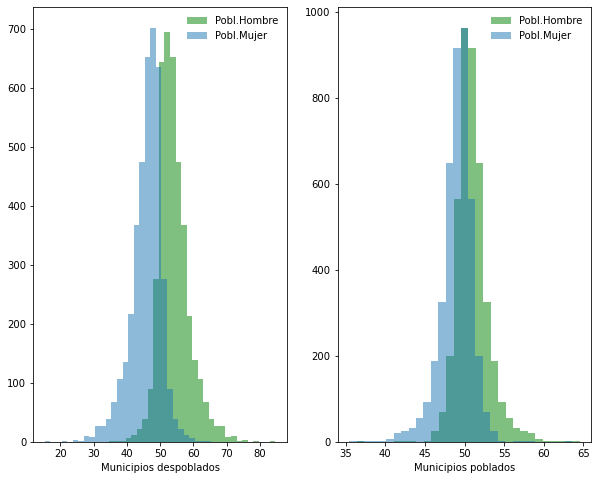

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax1.hist(Despoblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')

ax2.hist(Poblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax2.hist(Poblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Nacimientos y defunciones segmentado por municipios despoblados y poblados:

In [40]:
Poblado['PorcentNacimientos'] = (Poblado['Nacimientos'] / Poblado['Poblacion Total'])
Despoblado['PorcentNacimientos'] = (Despoblado['Nacimientos'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentDefunciones'] = (Poblado['Defunciones'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentDefunciones'] = (Despoblado['Defunciones'] / Despoblado['Poblacion Total'])*100

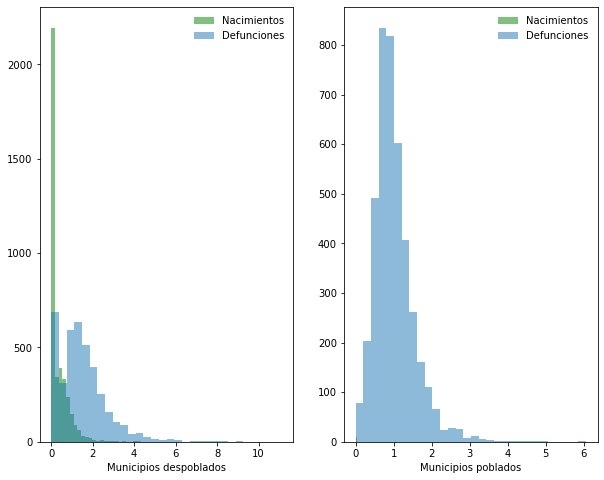

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax1.hist(Despoblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')

ax2.hist(Poblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax2.hist(Poblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población igual o mayor a 65 años segmentada por municipios despoblados y poblados:

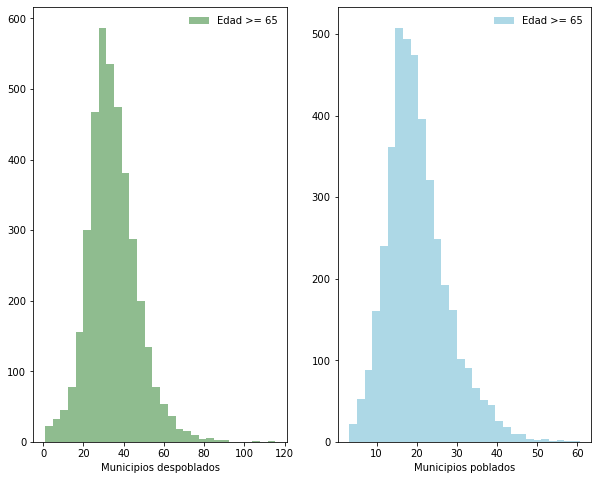

In [42]:
Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Porcent65'], bins = 30, color='darkseagreen', label = 'Edad >= 65')
ax2.hist(Poblado['Porcent65'], bins = 30, color='lightblue', label = 'Edad >= 65')

ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población con y sin estudios segmentada por municipios despoblados y poblados:

In [43]:
Poblado['PorcentEstudios'] = (Poblado['Con Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentEstudios'] = (Despoblado['Con Estudios'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentNoEstudios'] = (Poblado['Sin Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentNoEstudios'] = (Despoblado['Sin Estudios'] / Despoblado['Poblacion Total'])*100

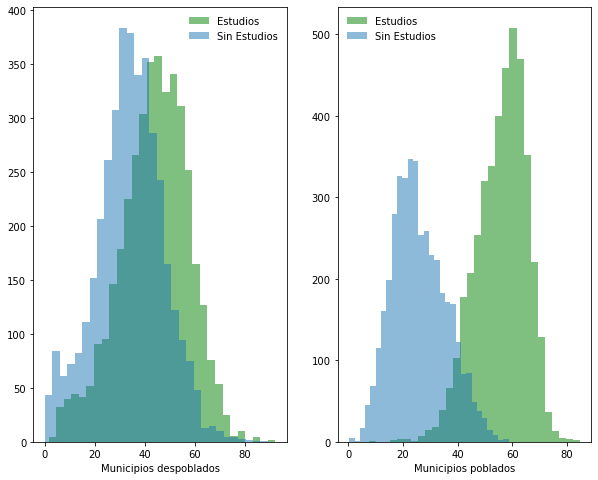

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax1.hist(Despoblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')

ax2.hist(Poblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax2.hist(Poblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [45]:
Despoblado[Despoblado['PorcentNoEstudios']>85]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
3067,Castilla-La Mancha,08,Guadalajara,19,Torrecuadradilla,19278,35.0,20.0,15.0,32.88,1.06,1020.0,0.0,0.0,1.0,4.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,54.0,56.0,56.0,2.0,5.0,25.0,10.0,20.0,2.0,2.0,2.0,30.0,4.0,25.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,2.0,25.0,2.0,15.0,15.0,2.0,2.0,2.0,2.0,15.0,31.0,18.0,0.0,0.0,481.12,4.0,1.0,1.0,57.142857,42.857143,0.0,2.857143,71.428571,11.428571,85.714286
5349,Castilla y León,07,Salamanca,37,"Bastida, La",37045,28.0,17.0,11.0,18.53,1.51,1112.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,32.0,32.0,32.0,2.0,15.0,15.0,2.0,20.0,2.0,2.0,2.0,25.0,7.0,15.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,10.0,2.0,2.0,2.0,2.0,2.0,15.0,9.0,9.0,0.0,7.0,1258.42,11.0,3.0,1.0,60.714286,39.285714,0.0,0.000000,53.571429,25.000000,89.285714


Nº de hogares sin internet segmentados por municipios despoblados y poblados:

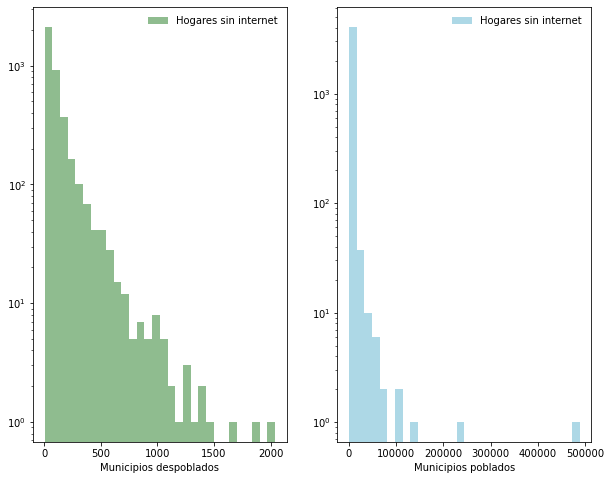

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Nº Hogares no Internet'], bins = 30, color='darkseagreen', label = 'Hogares sin internet')
ax2.hist(Poblado['Nº Hogares no Internet'], bins = 30, color='lightblue', label = 'Hogares sin internet')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [47]:
Poblado[Poblado['Nº Hogares no Internet']>480000]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
4337,Comunidad de Madrid,13,Madrid,28,Madrid,28079,3265038.0,1529842.0,1735196.0,605.77,5389.9,657.0,32938.0,12941.0,26544.0,1736667.0,1103251.0,557850.0,545401.0,222103.0,111893.0,110210.0,201.0,4419.0,9450.0,135395.0,187.0,1706.0,20425.0,145.0,102.0,291260.0,338909.0,630169.0,384806.0,511987.0,896793.0,131726.0,1615548.0,1530957.0,458500.0,2112935.0,615165.0,1486500.0,1315145.0,50425.0,114875.0,219655.0,520020.0,2208075.0,637855.0,72960.0,105625.0,234485.0,382030.0,156535.0,104030.0,665045.0,379830.0,2806765.0,379830.0,819840.0,753335.0,794910.0,289370.0,149315.0,832160.0,488370.0,1970814.0,1635666.0,6347900.0,1884054.26,21945.89,127.0,44.0,0.0,46.855259,53.144741,0.010088,0.812977,18.840975,67.62785,15.92692


Grupos de edades segmentadas por municipios despoblados y poblados:

In [48]:
Poblado['Porcent16'] = (Poblado['Edad < 16'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent16'] = (Despoblado['Edad < 16'] / Despoblado['Poblacion Total'])*100

Poblado['Porcent16_64'] = (Poblado['16 =< Edad =<64'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent16_64'] = (Despoblado['16 =< Edad =<64'] / Despoblado['Poblacion Total'])*100

Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

EdadDespoblado = Despoblado[['Porcent16', 'Porcent16_64', 'Porcent65']]
EdadPoblado = Poblado[['Porcent16', 'Porcent16_64', 'Porcent65']]

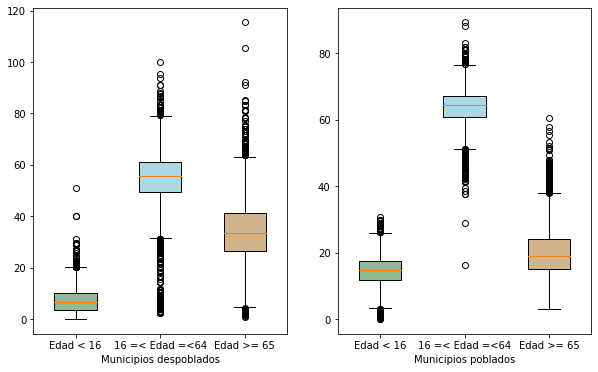

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(EdadDespoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])
box2 = ax2.boxplot(EdadPoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])

colors = ['darkseagreen', 'lightblue', 'tan']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

Número de personas extranjeras segmentadas por municipios despoblados y poblados:

In [50]:
Poblado['PorcentHombre'] = (Poblado['Nº Hombres Extranjeros'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Nº Hombres Extranjeros'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentMujer'] = (Poblado['Nº Mujeres Extranjeras'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Nº Mujeres Extranjeras'] / Despoblado['Poblacion Total'])*100

ExtranDespoblado = Despoblado[['PorcentHombre', 'PorcentMujer']]
ExtranPoblado = Poblado[['PorcentHombre', 'PorcentMujer']]

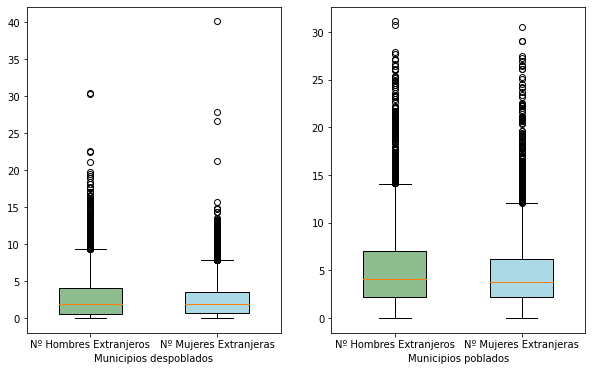

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(ExtranDespoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])
box2 = ax2.boxplot(ExtranPoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

In [52]:
Despoblado[Despoblado['PorcentMujer']>40]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios,Porcent16,Porcent16_64
5900,Castilla y León,07,Segovia,40,Fuente el Olmo de Fuentidueña,40083,172.0,61.0,111.0,31.18,5.52,850.0,1.0,0.0,0.0,31.0,600.0,87.0,513.0,10.0,4.0,6.0,2.0,0.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,9.0,69.0,78.0,2.0,1.0,3.0,185.0,188.0,187.0,2.0,45.0,110.0,30.0,80.0,2.0,2.0,45.0,100.0,57.0,100.0,2.0,2.0,20.0,45.0,2.0,2.0,2.0,60.0,100.0,60.0,60.0,5.0,35.0,2.0,2.0,2.0,90.0,110.0,57.0,0.0,0.0,1298.13,51.0,6.0,1.0,5.232558,40.116279,0.581395,0.0,63.953488,33.139535,58.139535,1.162791,26.162791


Número de hogares unipersonales y familiares segmentadas por municipios despoblados y poblados:

In [53]:
HogarDespoblado = Despoblado[['Hogares Unipersonales', 'Hogares Familiares']]
HogarPoblado = Poblado[['Hogares Unipersonales', 'Hogares Familiares']]

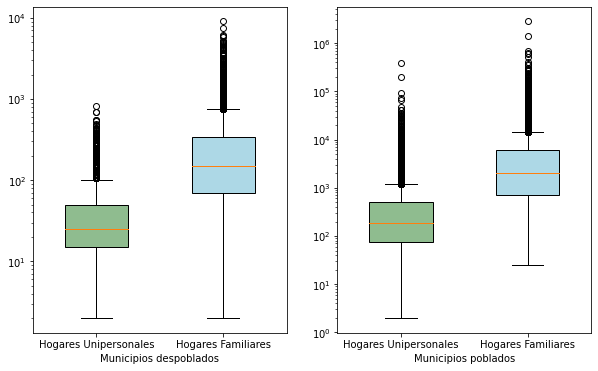

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(HogarDespoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])
box2 = ax2.boxplot(HogarPoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()